In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Load data

In [2]:
RESAMPLE = '1m'

In [3]:
price = pickle.load(open('price_data.pkl', 'rb'))

In [4]:
# price = price.drop('DAI', axis=1)
price = price.dropna()

In [5]:
# data incl DAI is from June 2018 (10.5 months)
price.head(5)

,ETH,BAT,BNB,DAI,ENJ,KNC,MKR,OMG,REP,ZIL,ZRX
2018-06-10 22:20:07.665507072+00:00,519.871,0.225010,13.7450,0.991690,0.086149,1.10618,684.482,9.58670,32.9943,0.101025,1.03750
2018-06-10 22:26:07.894973952+00:00,514.353,0.225062,13.6791,0.996235,0.086369,1.10377,682.162,9.58319,33.0722,0.101260,1.03717
2018-06-10 22:28:08.102124032+00:00,514.353,0.225062,13.6791,0.996235,0.086369,1.10377,682.162,9.58319,33.0722,0.101260,1.03717
2018-06-10 22:30:07.604295936+00:00,514.353,0.225062,13.6791,0.996235,0.086369,1.10377,682.162,9.58319,33.0722,0.101260,1.03717
2018-06-10 22:32:07.741512960+00:00,512.402,0.221597,13.6487,0.996947,0.085640,1.08941,670.976,9.48857,32.7800,0.100134,1.02930


In [6]:
price = price.resample(RESAMPLE).mean()
price.head()

,ETH,BAT,BNB,DAI,ENJ,KNC,MKR,OMG,REP,ZIL,ZRX
2018-06-30 00:00:00+00:00,480.788512,0.239337,15.278060,0.994702,0.065953,0.917408,546.733914,8.409844,32.468147,0.077537,0.781577
2018-07-31 00:00:00+00:00,463.804209,0.301298,13.226632,0.993268,0.061857,0.940674,593.397049,7.338490,32.005280,0.075337,1.042404
2018-08-31 00:00:00+00:00,319.365946,0.222907,11.089599,1.003640,0.042173,0.530905,467.404902,4.318846,21.254401,0.041859,0.805455
2018-09-30 00:00:00+00:00,227.531486,0.172900,10.046526,1.002319,0.044522,0.407828,421.437611,3.625256,14.775307,0.036315,0.626700
2018-10-31 00:00:00+00:00,210.444088,0.209122,9.892042,1.003060,0.051107,0.409902,633.600491,3.315621,13.094285,0.035087,0.771285


In [7]:
tokens = price.columns.tolist()
tokens

['ETH', 'BAT', 'BNB', 'DAI', 'ENJ', 'KNC', 'MKR', 'OMG', 'REP', 'ZIL', 'ZRX']

# Price

In [8]:
initial_price = price.iloc[0]
initial_price

ETH    480.788512
BAT      0.239337
BNB     15.278060
DAI      0.994702
ENJ      0.065953
KNC      0.917408
MKR    546.733914
OMG      8.409844
REP     32.468147
ZIL      0.077537
ZRX      0.781577
Name: 2018-06-30 00:00:00+00:00, dtype: float64

# Returns

In [9]:
returns = price.pct_change().dropna() + 1
returns

,ETH,BAT,BNB,DAI,ENJ,KNC,MKR,OMG,REP,ZIL,ZRX
2018-07-31 00:00:00+00:00,0.964674,1.258887,0.865727,0.998558,0.937900,1.025361,1.085349,0.872607,0.985744,0.971625,1.333719
2018-08-31 00:00:00+00:00,0.688579,0.739822,0.838430,1.010442,0.681783,0.564388,0.787676,0.588520,0.664090,0.555625,0.772690
2018-09-30 00:00:00+00:00,0.712448,0.775661,0.905941,0.998684,1.055699,0.768176,0.901654,0.839404,0.695165,0.867561,0.778070
2018-10-31 00:00:00+00:00,0.924901,1.209496,0.984623,1.000740,1.147897,1.005085,1.503427,0.914590,0.886228,0.966168,1.230708
2018-11-30 00:00:00+00:00,0.808415,1.074510,0.780632,0.996161,0.761951,0.725221,0.843080,0.779488,0.885206,0.761593,0.752451
2018-12-31 00:00:00+00:00,0.644438,0.654746,0.686007,1.012164,0.853454,0.530532,0.737790,0.547806,0.637695,0.617393,0.584364
2019-01-31 00:00:00+00:00,1.172533,0.867185,1.189878,0.994564,1.060100,0.909780,1.154784,0.932466,1.588638,1.294176,0.874163
2019-02-28 00:00:00+00:00,0.984315,1.008750,1.433928,0.996660,1.072631,0.952206,1.161661,0.908602,1.155005,0.825218,0.819614
2019-03-31 00:00:00+00:00,1.086131,1.601313,1.677624,0.993710,4.169476,1.798409,1.314979,1.284590,1.056308,1.046384,1.118772
2019-04-30 00:00:00+00:00,1.214795,1.484505,1.260772,0.991651,0.993601,1.130543,1.002721,1.354852,1.384504,1.209975,1.248634


In [10]:
final_returns = np.prod(returns, axis=0)
print(final_returns)
print(final_returns.mean())

ETH    0.347250
BAT    1.278282
BNB    1.251278
DAI    0.993144
ENJ    2.373797
KNC    0.302791
MKR    1.275029
OMG    0.248242
REP    0.610907
ZIL    0.287705
ZRX    0.434294
dtype: float64
0.8547926362534614


In [11]:
price.iloc[-1] / initial_price

ETH    0.347250
BAT    1.278282
BNB    1.251278
DAI    0.993144
ENJ    2.373797
KNC    0.302791
MKR    1.275029
OMG    0.248242
REP    0.610907
ZIL    0.287705
ZRX    0.434294
dtype: float64

# Portfolio returns

https://www.chrisstucchio.com/blog/2015/constant_rebalanced_portfolios.html

In [12]:
# uniform allocation
allocation = np.ones(len(tokens)) / len(tokens)
allocation

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

In [13]:
total_return = np.dot(final_returns, allocation)
# total_period = np.power(total_return, 1.0 / len(price))
total_return, final_returns.mean()

(0.8547926362534616, 0.8547926362534614)

In [14]:
cum_returns = returns.cumprod()
cum_returns

,ETH,BAT,BNB,DAI,ENJ,KNC,MKR,OMG,REP,ZIL,ZRX
2018-07-31 00:00:00+00:00,0.964674,1.258887,0.865727,0.998558,0.937900,1.025361,1.085349,0.872607,0.985744,0.971625,1.333719
2018-08-31 00:00:00+00:00,0.664255,0.931352,0.725851,1.008985,0.639444,0.578701,0.854904,0.513547,0.654623,0.539859,1.030551
2018-09-30 00:00:00+00:00,0.473247,0.722414,0.657579,1.007657,0.675061,0.444544,0.770828,0.431073,0.455071,0.468361,0.801840
2018-10-31 00:00:00+00:00,0.437706,0.873757,0.647467,1.008403,0.774901,0.446805,1.158883,0.394255,0.403296,0.452515,0.986831
2018-11-30 00:00:00+00:00,0.353848,0.938860,0.505434,1.004531,0.590436,0.324032,0.977031,0.307317,0.357000,0.344632,0.742542
2018-12-31 00:00:00+00:00,0.228033,0.614715,0.346731,1.016750,0.503910,0.171909,0.720843,0.168350,0.227657,0.212773,0.433915
2019-01-31 00:00:00+00:00,0.267377,0.533071,0.412567,1.011222,0.534195,0.156400,0.832419,0.156980,0.361665,0.275366,0.379313
2019-02-28 00:00:00+00:00,0.263183,0.537736,0.591592,1.007845,0.572994,0.148925,0.966988,0.142633,0.417725,0.227237,0.310890
2019-03-31 00:00:00+00:00,0.285851,0.861083,0.992469,1.001505,2.389084,0.267827,1.271570,0.183225,0.441246,0.237778,0.347815
2019-04-30 00:00:00+00:00,0.347250,1.278282,1.251278,0.993144,2.373797,0.302791,1.275029,0.248242,0.610907,0.287705,0.434294


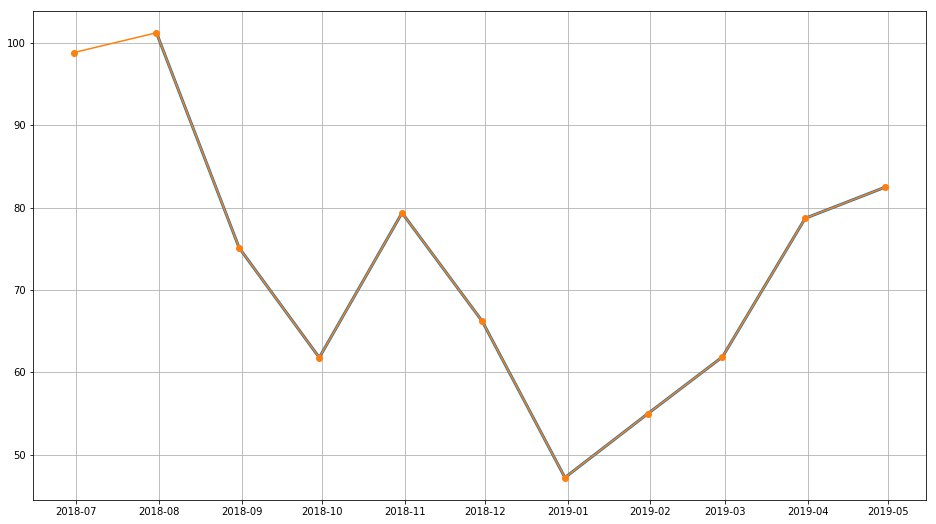

In [15]:
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.plot(cum_returns.index, (cum_returns * price.iloc[0]).mean(axis=1), linewidth=3)
ax.plot(price.mean(axis=1), 'o-', alpha=1)
ax.grid(True, 'both');

In [16]:
return_per_period = np.dot(returns, allocation) # == np.mean(returns, axis=1)
return_per_period

array([1.02728646, 0.71745869, 0.84531475, 1.07035105, 0.83351878,
       0.68239892, 1.09438769, 1.02896286, 1.55888144, 1.20695954])

In [17]:
rb_cum_return = np.prod(np.dot(returns, allocation))
rb_cum_return

0.8036437460062188

In [18]:
rb_cum_returns = return_per_period.cumprod()

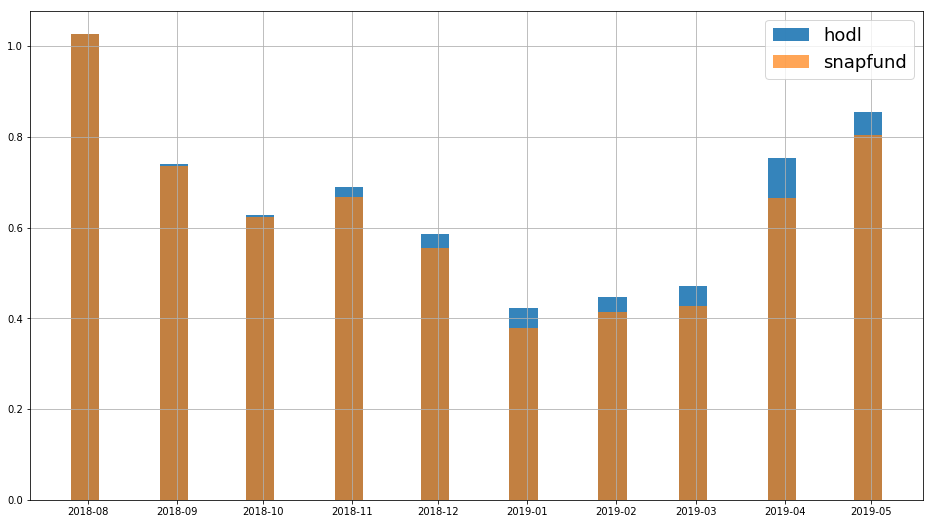

In [19]:
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.bar(returns.index, cum_returns.mean(axis=1), width=10, alpha=0.9, label='hodl')
ax.bar(returns.index, rb_cum_returns, width=10, alpha=0.7, label='snapfund')
ax.grid(True, 'both')
ax.legend(fontsize=18);